### Import Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,\
precision_score, recall_score, accuracy_score, f1_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df = pd.read_csv('Dentistry Dataset.csv')
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


### Check for null values

In [3]:
df.isna().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [4]:
df.drop('Gender', axis=1).describe()

,Sl No,Sample ID,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,0.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,550.500000,NaN,21.625455,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,317.686953,NaN,2.085892,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,1.000000,NaN,18.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,275.750000,NaN,20.000000,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,550.500000,NaN,22.000000,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,825.250000,NaN,23.000000,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000
max,1100.000000,NaN,25.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


### Check if data is imbalance

In [5]:
df.Gender.value_counts()

Male      550
Female    550
Name: Gender, dtype: int64

### Set 'Gender' to 0 and 1

In [6]:
encoder = LabelEncoder()
df.Gender = encoder.fit_transform(df.Gender)
df.Gender.head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int32

### Check the correlation

In [7]:
df_1 = df.drop(['Sl No', 'Sample ID'], axis=1)

<AxesSubplot:>

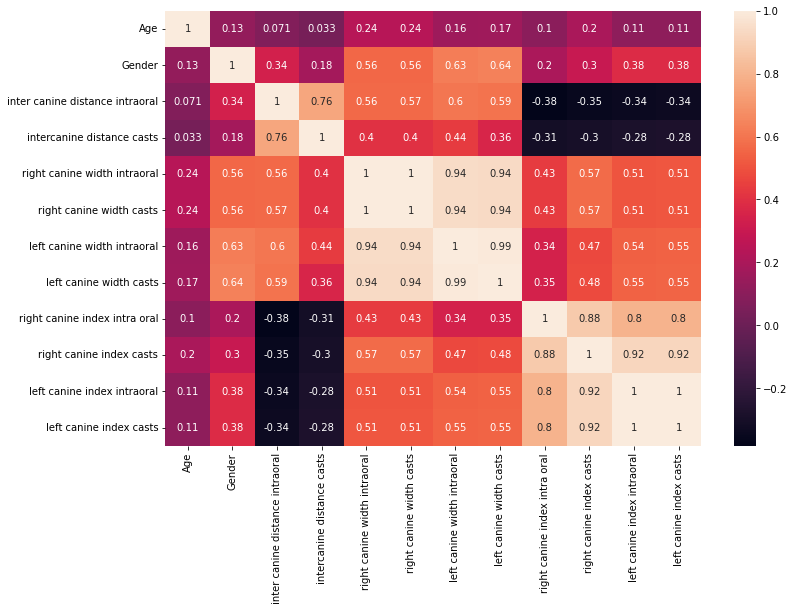

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df_1.corr(), annot=True)

### Remove columns that have high correlation

In [9]:
 high_corr = np.where(df_1.corr()>0.8)

In [10]:
[(df_1.corr().index[x], df_1.corr().columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

[('right canine width intraoral', 'right canine width casts'),
 ('right canine width intraoral', 'left canine width intraoral'),
 ('right canine width intraoral', 'left canine width casts'),
 ('right canine width casts', 'left canine width intraoral'),
 ('right canine width casts', 'left canine width casts'),
 ('left canine width intraoral', 'left canine width casts'),
 ('right canine index intra oral', 'right canine index casts'),
 ('right canine index casts', 'left canine index intraoral'),
 ('right canine index casts', 'left canine index casts'),
 ('left canine index intraoral', 'left canine index casts')]

In [11]:
df_1.drop(['right canine width casts', 'left canine width intraoral', 'left canine width casts', 'right canine index casts',
           'left canine index intraoral', 'left canine index casts'], axis=1, inplace=True)

<AxesSubplot:>

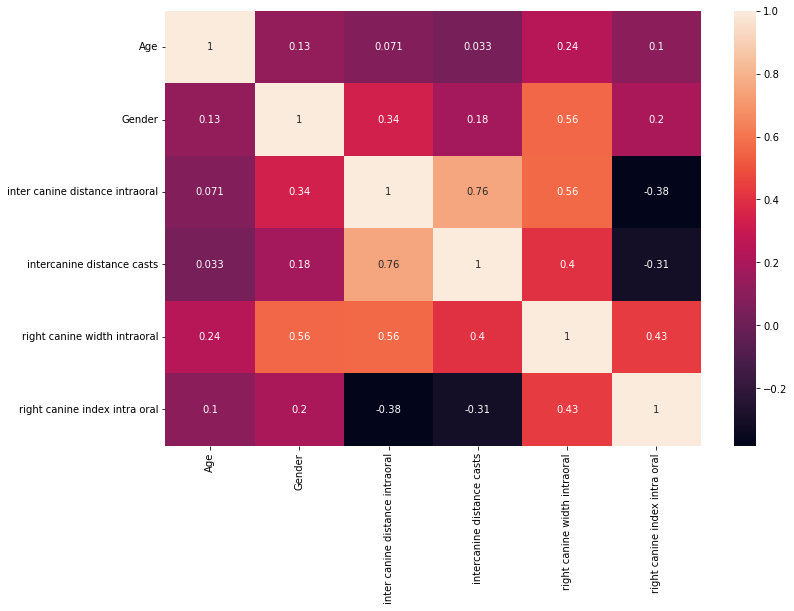

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df_1.corr(), annot=True)

### Split the dataset into X (input) and y (output)

In [13]:
X = df_1.drop('Gender', axis=1)
y = df_1.Gender

### Split the dataset into train and test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55, stratify=y)

### Normalize the input data (X)

In [15]:
scaler = Normalizer()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

### train and test the model

In [16]:
precision = []
recall = []
accuracy = []
f1 = []
auc = []

def report(y_test, y_pred):
    precision.append(round(precision_score(y_test, y_pred), 2))
    recall.append(round(recall_score(y_test, y_pred), 2))
    accuracy.append(round(accuracy_score(y_test, y_pred), 2))
    f1.append(round(f1_score(y_test, y_pred),2))
    auc.append(round(roc_auc_score(y_test, y_pred), 2))
    print('Precision: {}\t Recall: {}\t Accuracy: {}'.format(precision[-1], recall[-1], accuracy[-1]))
    print('F1: {}\t AUC: {}'.format(f1[-1], auc[-1]))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)#, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Ground Truth')
    return plt.show()
        

In [17]:
lg = LogisticRegression(random_state=55)

lg.fit(X_train_scale, y_train)

LogisticRegression(random_state=55)

In [18]:
y_pred = lg.predict(X_test_scale)

Precision: 0.58	 Recall: 0.43	 Accuracy: 0.56
F1: 0.49	 AUC: 0.56


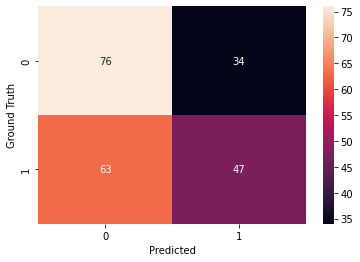

In [19]:
report(y_test, y_pred)

In [20]:
dt = DecisionTreeClassifier(random_state=55)

dt.fit(X_train_scale, y_train)

DecisionTreeClassifier(random_state=55)

In [21]:
y_pred = dt.predict(X_test_scale)

Precision: 0.85	 Recall: 0.83	 Accuracy: 0.84
F1: 0.84	 AUC: 0.84


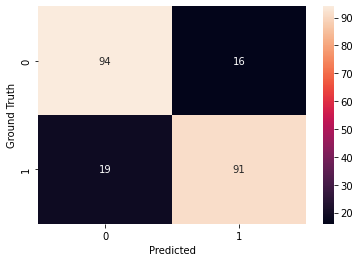

In [22]:
report(y_test, y_pred)

In [23]:
rf = RandomForestClassifier(random_state=55)

rf.fit(X_train_scale, y_train)

RandomForestClassifier(random_state=55)

In [24]:
y_pred = rf.predict(X_test_scale)

Precision: 0.85	 Recall: 0.85	 Accuracy: 0.85
F1: 0.85	 AUC: 0.85


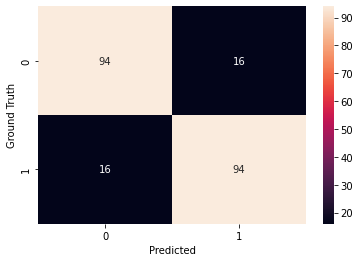

In [25]:
report(y_test, y_pred)

In [26]:
xgboost = xgb.XGBClassifier(random_state=55)

xgboost.fit(X_train_scale, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=55,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
y_pred = xgboost.predict(X_test_scale)

Precision: 0.85	 Recall: 0.85	 Accuracy: 0.85
F1: 0.85	 AUC: 0.85


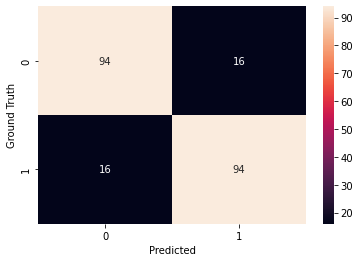

In [28]:
report(y_test, y_pred)

### RandomForest and XGBoost have the same score. Tune both model and see which perform better

### RandomForest

In [29]:
para_dict = {'n_estimators':[100,120,140,160,180], 'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':[12,14,16,18,20],
             'min_samples_split':[2,4,6,8,10], 'min_samples_leaf':[1,2,3,4,5],
             'max_features':['sqrt', 'log2']}

In [30]:
grid_model_rf = GridSearchCV(param_grid=para_dict, estimator=rf, n_jobs=-1)

grid_model_rf.fit(X_train_scale, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=55), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [12, 14, 16, 18, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 120, 140, 160, 180]})

In [31]:
grid_model_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 160}

In [32]:
tune_model = RandomForestClassifier(random_state=55, **grid_model_rf.best_params_)

tune_model.fit(X_train_scale, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, max_features='sqrt',
                       n_estimators=160, random_state=55)

In [33]:
y_pred_tune = tune_model.predict(X_test_scale)

In [34]:
print(classification_report(y_test, y_pred_tune))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       110
           1       0.87      0.88      0.88       110

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



Text(33.0, 0.5, 'Ground Truth')

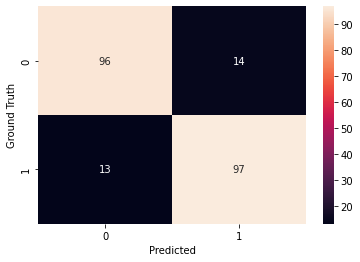

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred_tune), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

### XGBoost

In [37]:
para_dict_xgb = {'booster':['gbtree', 'gblinear', 'dart'], 'learning_rate':[0.1,0.01,0.001,0.0001,0.00001],
                 'max_delta_step':[0,1,2,3,4,5], 'max_depth':[6,7,8,9,10], 'n_estimator':[100,120,140,160,180]}

In [38]:
grid_model_xgb = GridSearchCV(param_grid=para_dict, estimator=xgboost, n_jobs=-1)

grid_model_xgb.fit(X_train_scale, y_train)

[13:47:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree..._state=55,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                  

In [39]:
grid_model_xgb.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 160}

In [41]:
tune_model_xgb = xgb.XGBClassifier(random_state=55, **grid_model_xgb.best_params_)

tune_model_xgb.fit(X_train_scale, y_train)

[13:57:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=14,
              max_features='sqrt', min_child_weight=1, min_samples_leaf=1,
              min_samples_split=2, missing=nan, monotone_constraints='()',
              n_estimators=160, n_jobs=0, num_parallel_tree=1, random_state=55,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
y_pred_xgb = tune_model_xgb.predict(X_test_scale)

In [43]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       110
           1       0.84      0.87      0.86       110

    accuracy                           0.85       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.86      0.85      0.85       220



In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

### RandomForest perform better then XGBoost. Plot the AUC, ROC curve

In [48]:
auc = roc_auc_score(y_test, y_pred_tune)
fpr, tpr, thresolds = roc_curve(y_test, y_pred_tune)

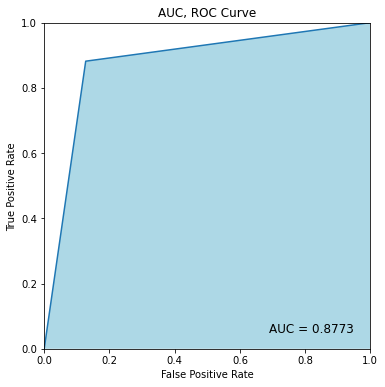

In [55]:
plt.figure(figsize=(12, 6))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC, ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor='lightblue')
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()